# Handwritten digits classification using neural network

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

2024-03-30 01:13:19.650621: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

We have 60,000 train images and 10,000 test images of different digits.

In [6]:
X_train[0].shape

(28, 28)

The images are of 28 x 28 pixels.

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

An image is 2D array of pixels, where each pixel is represented by a tuple (R,G,B) in a range of 0 - 255.

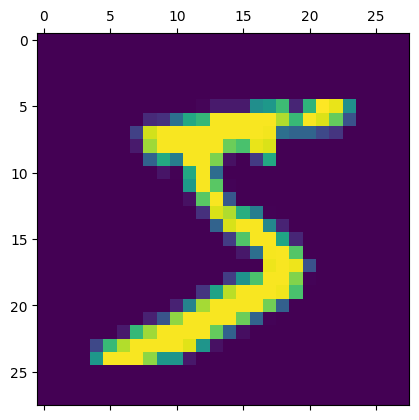

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

We need to scale the data before we feed into the Neural Network which makes the optimization process more efficient and effective.

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_trian_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
28 * 28

784

In [13]:
X_trian_flattened.shape

(60000, 784)

In [15]:
X_test_flattened.shape

(10000, 784)

### Simple Neural Network with No Hidden Layers

In [16]:
model = keras.Sequential([
    # stack of layers
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_trian_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4701 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3039 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9257


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2683 - accuracy: 0.9253


[0.2682698369026184, 0.9253000020980835]

In [19]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([2.4165077e-02, 4.1400369e-07, 6.0551442e-02, 9.4599199e-01,
       1.8177140e-03, 1.0715777e-01, 1.6713328e-06, 9.9975264e-01,
       7.6535486e-02, 6.5120870e-01], dtype=float32)

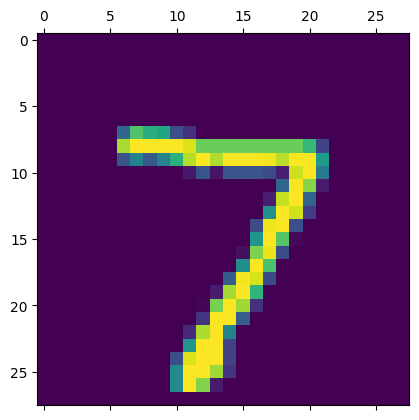

In [20]:
plt.matshow(X_test[0])

- np.argmax function in numpy finds a maximum element from an array and returns the index of it.

In [21]:
np.argmax(y_pred[0])

7

In [22]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [23]:
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    6,    7,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,   13,  922,   17,    7,    6,   13,   10,   33,    5],
       [   3,    0,   16,  920,    0,   29,    2,   10,   19,   11],
       [   1,    2,    2,    1,  892,    0,   17,    4,    7,   56],
       [   8,    3,    3,   30,    7,  785,   19,    3,   26,    8],
       [  11,    3,    5,    1,    7,    9,  919,    2,    1,    0],
       [   1,    6,   24,    5,    6,    0,    0,  944,    1,   41],
       [   7,   12,    7,   17,    8,   30,   10,   10,  858,   15],
       [  11,    7,    1,    9,   17,    8,    0,   19,    4,  933]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

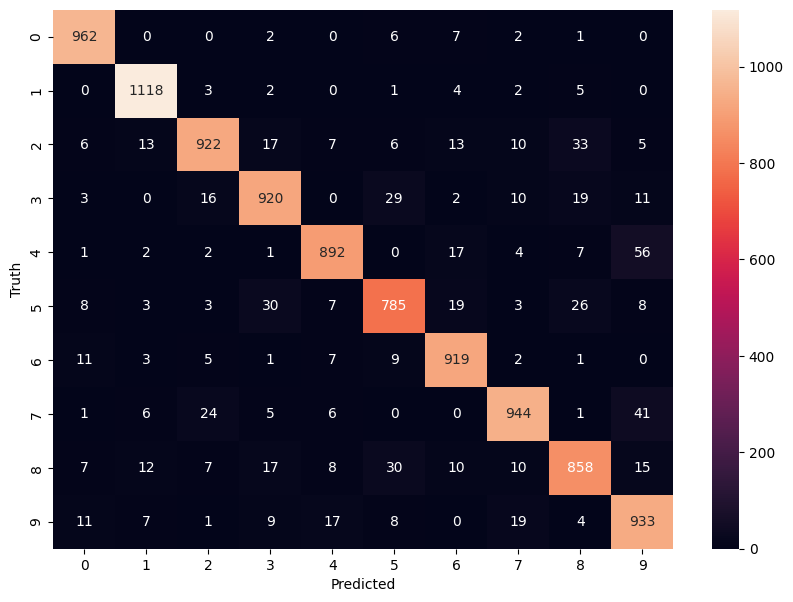

In [28]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Simple Neural Network using Hidden Layer

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # hidden layer 100 neurons
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_trian_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2752 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1256 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0872 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0672 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0516 - accuracy: 0.9840


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0802 - accuracy: 0.9753


[0.0801805779337883, 0.9753000140190125]

313/313 [==============================] - 4s 12ms/step


Text(0.5, 1.0, 'Confusion Matrix')

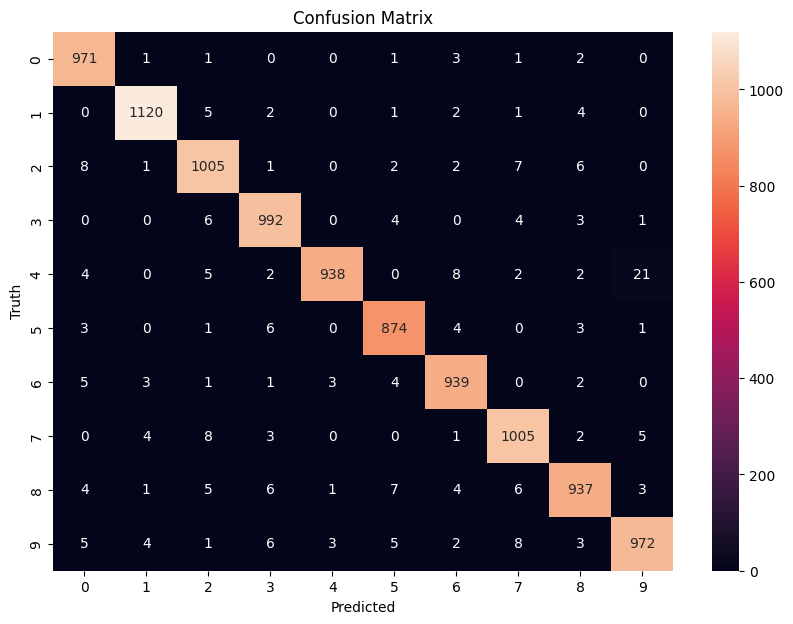

In [33]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

### Now using Flatten layer so that we don't have to call (.reshape) on input dataset

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2691 - accuracy: 0.9241
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1193 - accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0834 - accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0635 - accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0388 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0331 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0270 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0217 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - loss: 

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0791 - accuracy: 0.9781


[0.0790678858757019, 0.9781000018119812]

313/313 [==============================] - 1s 4ms/step


Text(0.5, 1.0, 'Confusion Matrix')

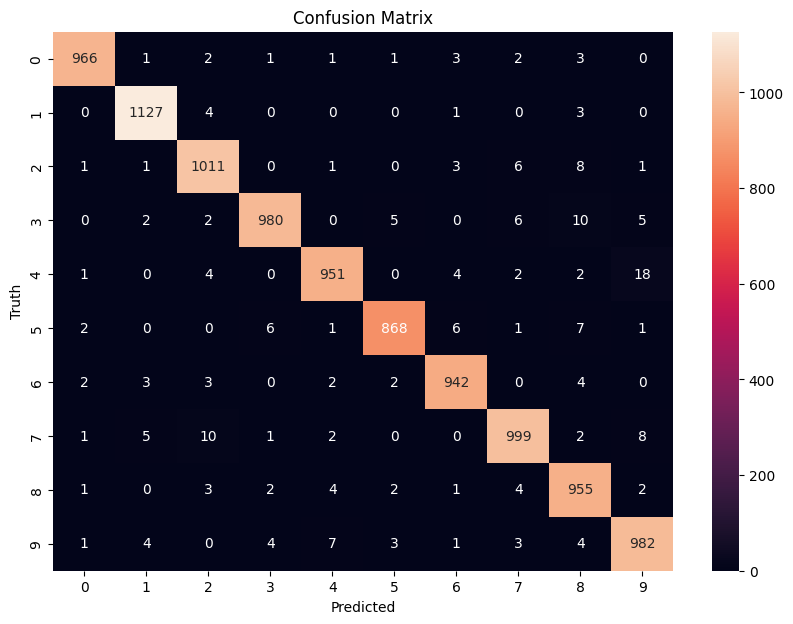

In [39]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')